In [1]:
import matplotlib.pyplot as plt
import pandas as pd

from bokeh.io import show, output_file, output_notebook, curdoc
from bokeh.models import ColumnDataSource, FactorRange
from bokeh.plotting import figure
from bokeh.transform import factor_cmap
from bokeh.palettes import inferno
output_notebook()

Loading BokehJS ...

In [2]:
df = pd.read_csv("CSV/disasters.csv")
df_sumed = df.groupby(['year']).sum()

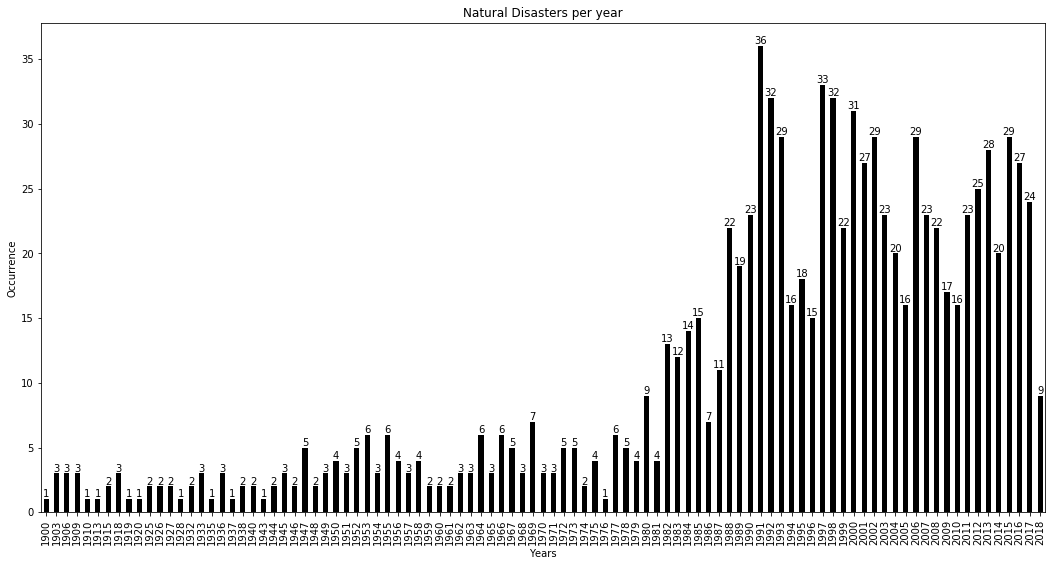

In [3]:
# Graph of Natural Disasters per year
result = list(zip(df_sumed.index, df_sumed.occurrence))

x_labels = [val[0] for val in result]
y_labels = [val[1] for val in result]
plt.figure(figsize=(18, 9))

ax = pd.Series(y_labels).plot(kind='bar', color="Black")
ax.set_xticklabels(x_labels)
ax.set_title("Natural Disasters per year")
ax.set_xlabel("Years")
ax.set_ylabel("Occurrence")

for rect in ax.patches:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%d' % int(height), ha='center', va='bottom')


plt.show()

In [8]:
#output_file("bar_colors.html")
output_notebook()

result = list(zip(df_sumed.index, df_sumed.occurrence))

years = list([str(val[0]) for val in result])
occurrences = list([str(val[1]) for val in result])

source = ColumnDataSource(data=dict(years=years, occurrences=occurrences, color=inferno(97)))

p = figure(x_range=years, y_range=occurrences, plot_height=350, title="Fruit Counts",
           toolbar_location=None, tools="")

p.vbar(x='years', top='occurrences', width=0.9, color='color', legend="years", source=source)

p.xgrid.grid_line_color = None
p.legend.orientation = "horizontal"
p.legend.location = "top_center"

show(p)

Loading BokehJS ...